<a href="https://colab.research.google.com/github/lukasbelka/datenanalyse-beispiel/blob/main/Datenanalyse_Beipsiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datenanalyse Beispiel

Dieses Jupyter Notebook enthält den begleitenden Code für den Beitrag [Daten analysieren - Schritt für Schritt](https://www.lukasbelka.com/blog/daten-analysieren). Es kann gelesen werden, wenn man allerdings die verarbeitete .csv-Datei herunterladen möchte, muss das Notebook zu Beginn einmalig über das obere Menü **Runtime -> Run all** gestartet werden.

Da das Ziel ist, die Nachvollziehbarkeit eines jeden Schrittes zu gewährleisten, finden sich sich weitaus mehr Code-Blöcke, als es normalerweise der Fall wäre.

Generell würde man einen großen Teil des Codes in wenigen Blöcken zusammenfassen und zum Teil - je nach Fortschritt in der Analyse - auskommentieren, um die Analyse schlank und präzise zu halten.








In [1]:
!git clone https://github.com/lukasbelka/datenanalyse-beispiel.git

Cloning into 'datenanalyse-beispiel'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 459.86 KiB | 5.68 MiB/s, done.
Resolving deltas: 100% (6/6), done.


## Laden der Bibilitoheken

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Schritt 1. Daten validieren

### 1.1 Daten einlesen und Überblick verschaffen

In [3]:
# Datei einlesen
df = pd.read_csv("/content/datenanalyse-beispiel/produkt-verkaeufe.csv")

# Form der Daten
df.shape

(15000, 8)

In [4]:
# Spalten, Datentypen und leere Zellen anzeigen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


### 1.2 Logische Checks

In [5]:
# Jede Spalte logisch prüfen

print(f"Wochen: {df['week'].unique()}")

print(f"Kundengruppen: {df['sales_method'].unique()}")

print(f"Anzahl Kunden: {df['customer_id'].nunique()}")

print(df[['nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']].describe())

print(f"Anzahl Bundesstaaten: {df['state'].nunique()}")

Wochen: [2 6 5 4 3 1]
Kundengruppen: ['Email' 'Email + Call' 'Call' 'em + call' 'email']
Anzahl Kunden: 15000
            nb_sold       revenue  years_as_customer  nb_site_visits
count  15000.000000  13926.000000       15000.000000    15000.000000
mean      10.084667     93.934943           4.965933       24.990867
std        1.812213     47.435312           5.044952        3.500914
min        7.000000     32.540000           0.000000       12.000000
25%        9.000000     52.470000           1.000000       23.000000
50%       10.000000     89.500000           3.000000       25.000000
75%       11.000000    107.327500           7.000000       27.000000
max       16.000000    238.320000          63.000000       41.000000
Anzahl Bundesstaaten: 50


## Schritt 2. Daten bereinigen

### 2.1. Daten bereinigen

In [6]:
# Fehlerhafte Kudengruppen bereinigen und WErte ersetzten
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})
print(f"Bereinigte Kundengruppen: {df['sales_method'].unique()}")

# Zeilen mit leerem Umsatz löschen
df_cleaned = df.dropna(subset=['revenue']).copy()
print(f"Anzahl der NaN-Werte: {df_cleaned['revenue'].isna().sum()}")

# Dauer der Kundenbeziehung bei 39 Jahren kappen
df_cleaned['years_as_customer'] = df_cleaned['years_as_customer'].clip(upper=39)
print(f"Maximale Dauer der Kundenbeziehung: {df['years_as_customer'].max()}")

Bereinigte Kundengruppen: ['Email' 'Email + Call' 'Call']
Anzahl der NaN-Werte: 0
Maximale Dauer der Kundenbeziehung: 63


### 2.2 Daten anreichern

In [7]:
# Gruppen für die Dauer der Kundenbeziehung erstellen
segment_ranges = [-0.1, 5, 10, np.inf]
segment_labels = ['<5', '5-10', '>10']
df_cleaned['customer_segment'] = pd.cut(df_cleaned['years_as_customer'], bins=segment_ranges, labels=segment_labels)

#Check der Erstellung
print(df_cleaned['customer_segment'].value_counts())

#Check der Anzahl der Werte
print(f"Gesamtanzahl neuer Werte: {df_cleaned['customer_segment'].value_counts().sum()}")

customer_segment
<5      9299
5-10    2924
>10     1703
Name: count, dtype: int64
Gesamtanzahl neuer Werte: 13926


In [8]:
# Abschließender Check
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13926 entries, 1 to 14998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               13926 non-null  int64   
 1   sales_method       13926 non-null  object  
 2   customer_id        13926 non-null  object  
 3   nb_sold            13926 non-null  int64   
 4   revenue            13926 non-null  float64 
 5   years_as_customer  13926 non-null  int64   
 6   nb_site_visits     13926 non-null  int64   
 7   state              13926 non-null  object  
 8   customer_segment   13926 non-null  category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 992.9+ KB


## Schritt 3. Datenanalyse

Wie teilen sich die Kundengruppen auf?

Erläuterung im Beitrag [Daten analysieren - Schritt für Schritt](https://www.lukasbelka.com/blog/daten-analysieren).

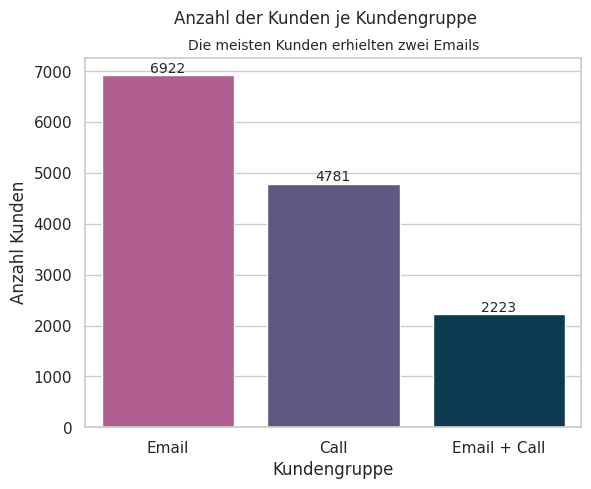

sales_method
Email           0.497056
Call            0.343315
Email + Call    0.159629
Name: proportion, dtype: float64


In [9]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='sales_method',
              data=df_cleaned,
              order=['Email', 'Call', 'Email + Call'],
              palette=['#003f5c', '#58508d', '#bc5090'],
              hue='sales_method')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.set_title('Die meisten Kunden erhielten zwei Emails', fontsize=10)
ax.set_xlabel('Kundengruppe')
ax.set_ylabel('Anzahl Kunden')
ax = plt.suptitle('Anzahl der Kunden je Kundengruppe', fontsize=12)

plt.show()

#Berechnung der prozentualen Anteile der Kundengruppen
print(df_cleaned['sales_method'].value_counts(normalize=True))